<a href="https://colab.research.google.com/github/Torrescjua/ProyectoIA/blob/main/EDA_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries
df = pd.read_csv('/content/ds_salaries.csv')
df = df.iloc[:, 1:]
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
print(df.info())
print("\nDESCRIBE: \n",df.describe())
print("\nNULLS: \n",df.isnull().sum())
print("\nDUPLICATES: \n", df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB
None

DESCRIBE: 
          work_year        salary  salary_in_usd  remote_ratio
count   607.000000  6.070000e+02     607.000000     607.00000
mean   2021.405272  3.240001e+05  112297.869852      70.92257
std       0.6921

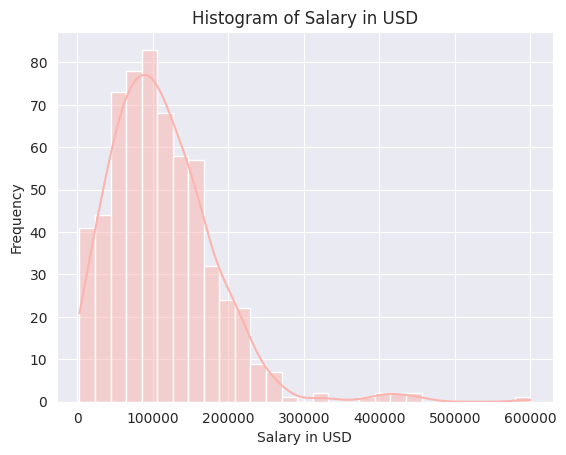

100000


In [ ]:
# Histograma de la variable objetivo
sns.histplot(df['salary_in_usd'], kde=True)
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.title('Histogram of Salary in USD')
plt.show()
print(df['salary_in_usd'].mode()[0])

La distribución de frecuencias es asimétrica a la derecha, lo que significa que hay más personas que ganan salarios más bajos que personas que ganan salarios más altos. La mediana de la distribución es de 101.570 USD, lo que significa que el 50% de las personas gana menos de 101.570 USD y el 50% de las personas gana más de 101.570 USD. La moda de la distribución es de 100.000 USD, lo que significa que este es el salario más común.

El promedio de salario es aproximadamente 112.000 USD.

El rango de la distribución es de 2859 a 600.000 USD. Esto significa que la persona con el salario más bajo gana 2859 USD y la persona con el salario más alto gana 600.000 USD.

         work_year        salary  salary_in_usd  remote_ratio
count   473.000000  4.730000e+02     473.000000    473.000000
mean   2021.503171  1.934147e+05  125361.016913     72.304440
std       0.657817  6.842176e+05   48152.799821     40.578136
min    2020.000000  4.090000e+04   54957.000000      0.000000
25%    2021.000000  8.166600e+04   87738.000000     50.000000
50%    2022.000000  1.200000e+05  117104.000000    100.000000
75%    2022.000000  1.600000e+05  157000.000000    100.000000
max    2022.000000  8.500000e+06  260000.000000    100.000000
Mode:  100000


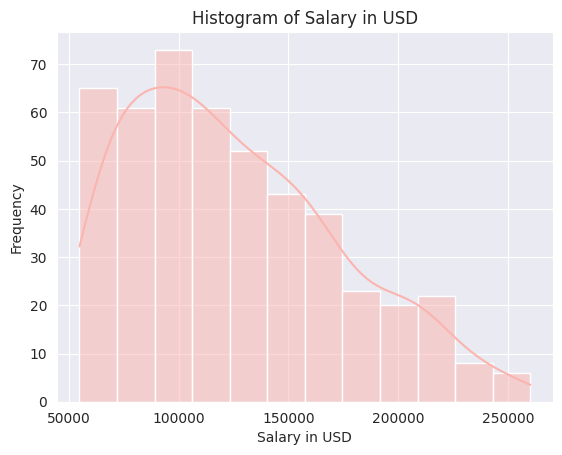

In [ ]:
# Paso 1: Calcula los percentiles
percentile_5_left = df['salary_in_usd'].quantile(0.2)
percentile_5_right = df['salary_in_usd'].quantile(0.98)

# Paso 2: Filtra los valores extremos
filtered_df = df[(df['salary_in_usd'] >= percentile_5_left) & (df['salary_in_usd'] <= percentile_5_right)]
print(filtered_df.describe())
print("Mode: ",filtered_df['salary_in_usd'].mode()[0])
# Paso 3: Crea el histograma
sns.histplot(filtered_df['salary_in_usd'], kde=True)
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.title('Histogram of Salary in USD')
plt.show()

Al excluir los valores extremos correspondientes al 2% izquierdo y derecho del conjunto de datos del salario la distribución de frecuencias es más simétrica que en el gráfico original. Esto significa que hay una mayor proporción de personas que ganan salarios medios.

La mediana de la distribución es de aproximadamente 115.000 USD, lo que significa que el 50% de las personas gana menos de 115.000 USD y el 50% de las personas gana más de 115.000 USD. La mediana es mayor que en los datos originales.

La moda se mantiene igual en 100.000 USD.

El promedio se salario es aproximadamente 125.000 USD, es decir, incremento aproximadamente 13.000 USD.

El rango de la distribución es de aproximadamente 55.000 USD a 260.000 USD. El rango es significativamente menor que en el gráfico original. Esto significa que la distribución de salarios es más concentrada en este caso.


## Análisis bivariado
Boxplots para comparar variables categóricas con la variable objetivo

### work_year

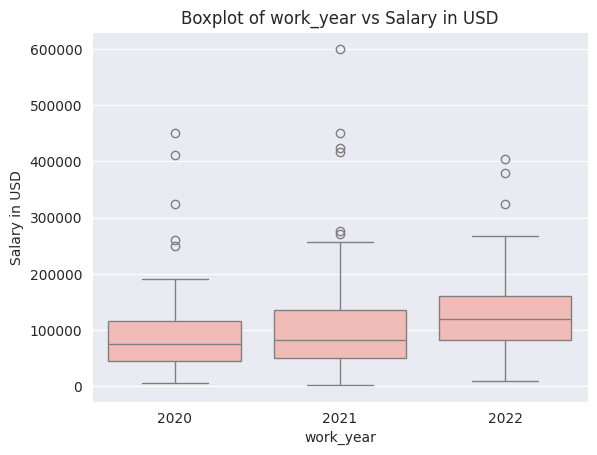

           count           mean           std      min      25%       50%  \
work_year                                                                   
2020        72.0   95813.000000  82831.799222   5707.0  45724.5   75544.0   
2021       217.0   99853.792627  80225.106319   2859.0  50000.0   82528.0   
2022       318.0  124522.006289  58183.647585  10000.0  81666.0  120000.0   

                75%       max  
work_year                      
2020       115526.0  450000.0  
2021       135000.0  600000.0  
2022       160000.0  405000.0  


In [ ]:

# Boxplots para comparar variables categóricas con la variable objetivo

sns.boxplot(x='work_year', y='salary_in_usd', data=df)
plt.xlabel('work_year')
plt.ylabel('Salary in USD')
plt.title('Boxplot of work_year vs Salary in USD')
plt.show()

df_filtered = df[df['work_year'].isin([2020, 2021, 2022])]

summary_by_year = df_filtered.groupby('work_year')['salary_in_usd'].describe()

print(summary_by_year)

El salario medio en 2020 es inferior al salario medio en 2021 y 2022.
Hay una gama más amplia de salarios en 2022 y 2021 en comparación con 2020. Hay valores atípicos tanto en el extremo inferior como en el superior en 2022.
Las personas ganaron salarios mucho más altos en 2022 en comparación con los años anteriores.

### experience_level

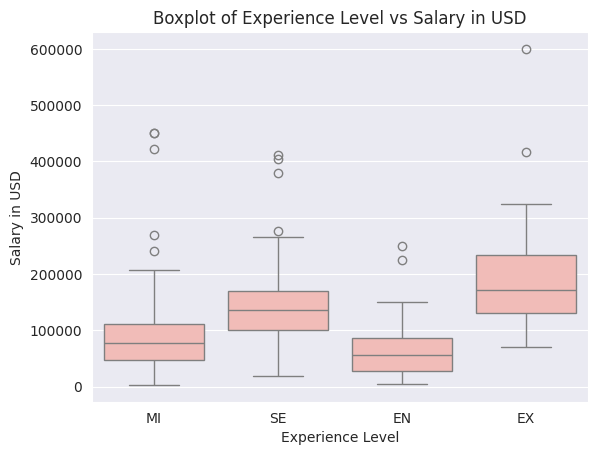

                  count           mean            std      min       25%  \
experience_level                                                           
EN                 88.0   61643.318182   44395.541126   4000.0   27505.0   
EX                 26.0  199392.038462  117071.255697  69741.0  130006.5   
MI                213.0   87996.056338   63901.057478   2859.0   48000.0   
SE                280.0  138617.292857   57691.978337  18907.0  100000.0   

                       50%        75%       max  
experience_level                                 
EN                 56500.0   85425.75  250000.0  
EX                171437.5  233750.00  600000.0  
MI                 76940.0  112000.00  450000.0  
SE                135500.0  170000.00  412000.0  


In [ ]:

sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.title('Boxplot of Experience Level vs Salary in USD')
plt.show()

df_filtered = df[df['experience_level'].isin(['MI', 'SE', 'EN','EX'])]

summary_by_exp = df_filtered.groupby('experience_level')['salary_in_usd'].describe()

print(summary_by_exp)


### remote_ratio

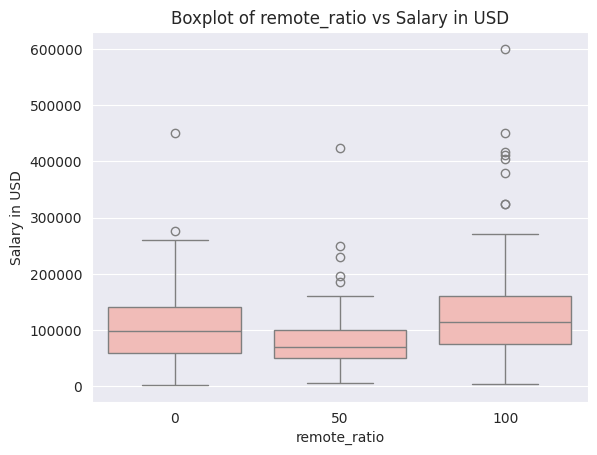

              count           mean           std     min      25%       50%  \
remote_ratio                                                                  
0             127.0  106354.622047  67724.540800  2859.0  60000.0   99000.0   
50             99.0   80823.030303  57353.093614  5409.0  50355.0   69999.0   
100           381.0  122457.454068  72710.843718  4000.0  75774.0  115000.0   

                   75%       max  
remote_ratio                      
0             140400.0  450000.0  
50             99851.5  423000.0  
100           160000.0  600000.0  


In [ ]:
sns.boxplot(x='remote_ratio', y='salary_in_usd', data=df)
plt.xlabel('remote_ratio')
plt.ylabel('Salary in USD')
plt.title('Boxplot of remote_ratio vs Salary in USD')
plt.show()


df_filtered = df[df['remote_ratio'].isin([0, 50, 100])]

summary_by_remote = df_filtered.groupby('remote_ratio')['salary_in_usd'].describe()

# Imprimir el resumen estadístico
print(summary_by_remote)

### company_size

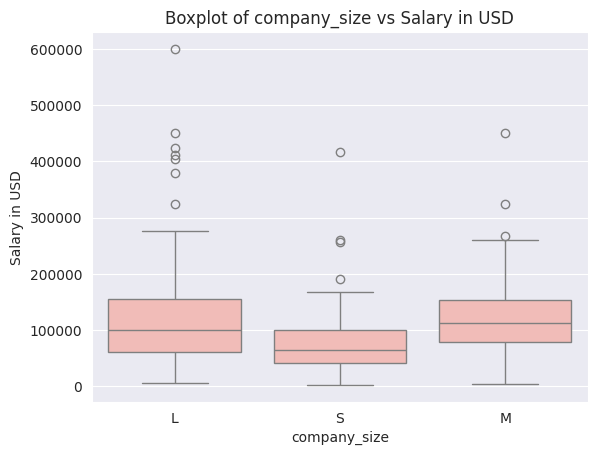

              count           mean           std     min       25%       50%  \
company_size                                                                   
L             198.0  119242.994949  86156.740692  5882.0  61041.75  100000.0   
M             326.0  116905.466258  59287.694614  4000.0  78131.50  113188.0   
S              83.0   77632.674699  63461.706497  2859.0  41943.00   65000.0   

                   75%       max  
company_size                      
L             154600.0  600000.0  
M             152875.0  450000.0  
S             100000.0  416000.0  


In [ ]:
sns.boxplot(x='company_size', y='salary_in_usd', data=df)
plt.xlabel('company_size')
plt.ylabel('Salary in USD')
plt.title('Boxplot of company_size vs Salary in USD')
plt.show()


df_filtered = df[df['company_size'].isin(['S', 'M', 'L'])]

summary_by_com_size = df_filtered.groupby('company_size')['salary_in_usd'].describe()

print(summary_by_com_size)

### employment_type

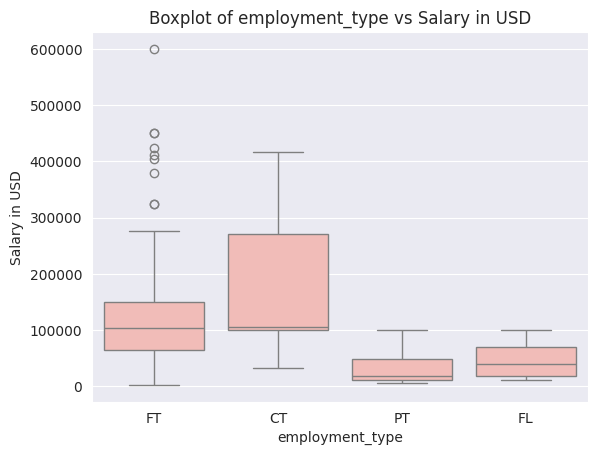

                 count           mean            std      min        25%  \
employment_type                                                            
CT                 5.0  184575.000000  156250.889997  31875.0  100000.00   
FL                 4.0   48000.000000   40529.824410  12000.0   18000.00   
FT               588.0  113468.073129   69476.470098   2859.0   64962.25   
PT                10.0   33070.500000   31472.907966   5409.0   12000.00   

                      50%       75%       max  
employment_type                                
CT               105000.0  270000.0  416000.0  
FL                40000.0   70000.0  100000.0  
FT               104196.5  150000.0  600000.0  
PT                18817.5   48370.0  100000.0  


In [ ]:
sns.boxplot(x='employment_type', y='salary_in_usd', data=df)
plt.xlabel('employment_type')
plt.ylabel('Salary in USD')
plt.title('Boxplot of employment_type vs Salary in USD')
plt.show()


df_filtered = df[df['employment_type'].isin(['PT', 'FT', 'CT','FL'])]

# Realizar un resumen estadístico para experiencia
summary_by_emp_type = df_filtered.groupby('employment_type')['salary_in_usd'].describe()

# Imprimir el resumen estadístico
print(summary_by_emp_type)

### Variables categóricas con alta gama de categorias

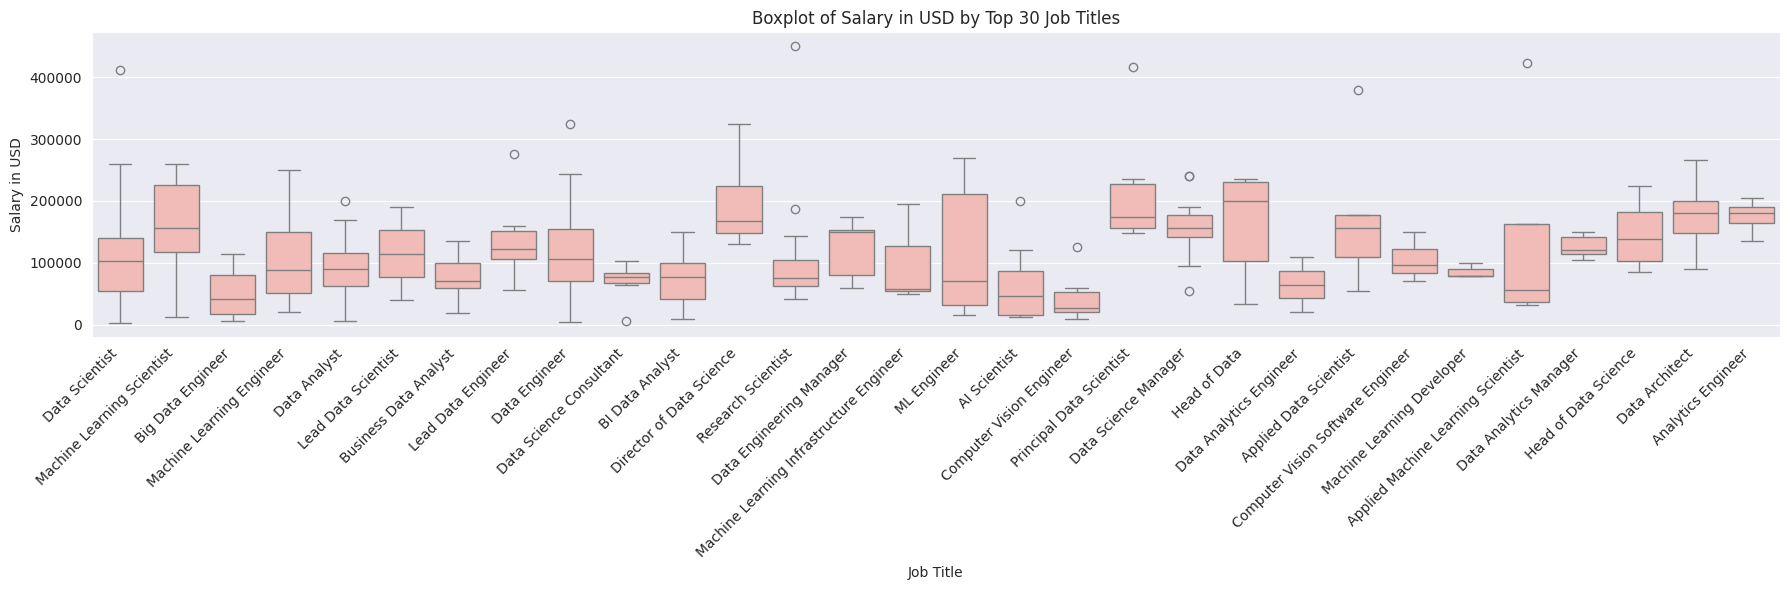

In [ ]:
# Seleccionar las top n categorías más frecuentes de job_title
top_n_categories = 30

top_categories = df['job_title'].value_counts().head(top_n_categories).index

# Filtrar el DataFrame para incluir solo las top n categorías
df_top_categories = df[df['job_title'].isin(top_categories)]

# Crear el boxplot
plt.figure(figsize=(18, 6))
sns.boxplot(x='job_title', y='salary_in_usd', data=df_top_categories)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Job Title')
plt.ylabel('Salary in USD')
plt.title('Boxplot of Salary in USD by Top 30 Job Titles')
plt.tight_layout()
plt.show()


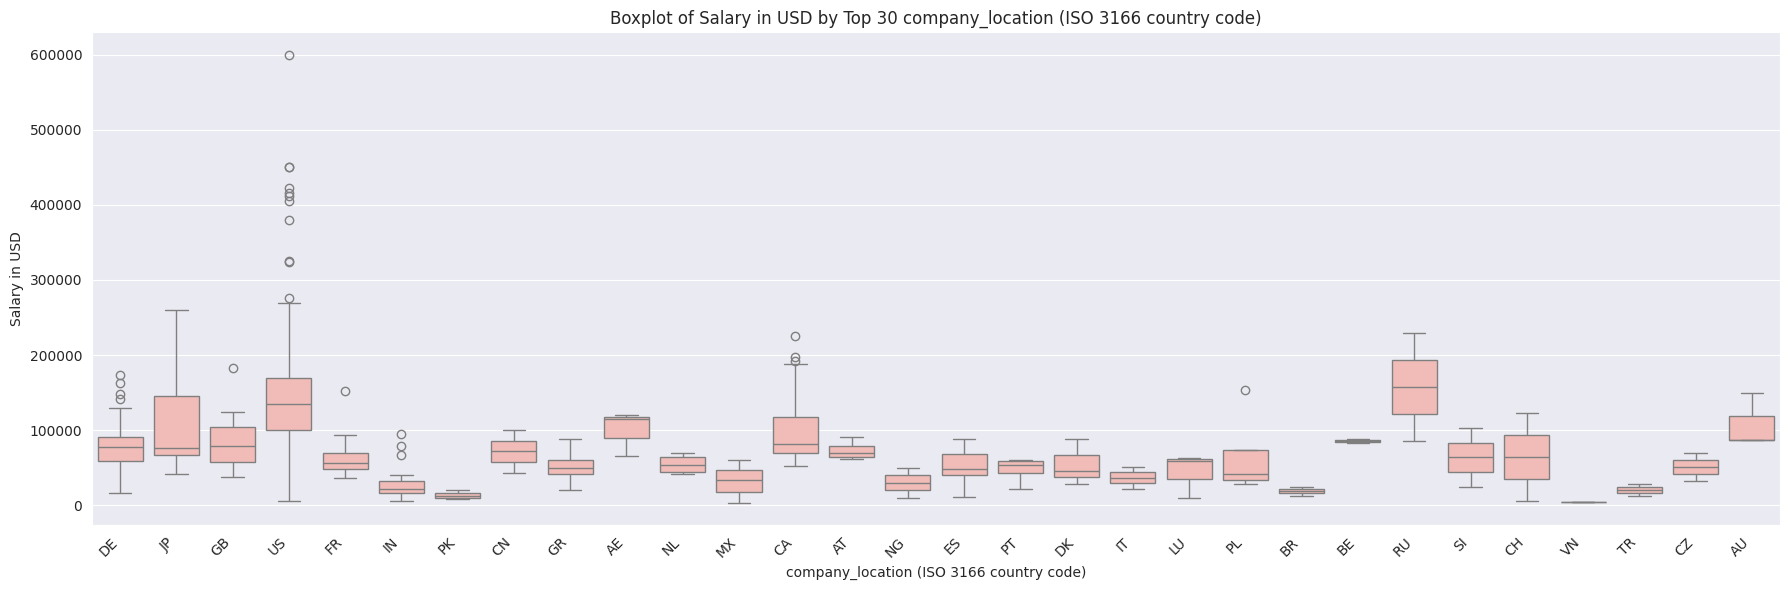

In [ ]:
top_categories = df['company_location'].value_counts().head(top_n_categories).index

# Filtrar el DataFrame para incluir solo las top n categorías
df_top_categories = df[df['company_location'].isin(top_categories)]

# Crear el boxplot
plt.figure(figsize=(18, 6))
sns.boxplot(x='company_location', y='salary_in_usd', data=df_top_categories)
plt.xticks(rotation=45, ha='right')
plt.xlabel('company_location (ISO 3166 country code)')
plt.ylabel('Salary in USD')
plt.title('Boxplot of Salary in USD by Top 30 company_location (ISO 3166 country code)')
plt.tight_layout()
plt.show()
